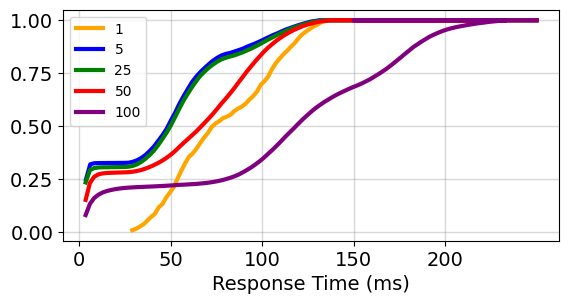

In [1]:
import matplotlib.pyplot as plt
import utils as ut
import numpy as np
##### CONFIG HERE #####
CONCUR_USER = 1
PERCENTAGE = 99
#######################
RESULT_FOLDER="result/14h_tue_11_06_24/"
FILE_NAME = "mul_edge_nonau"


scenarios = ["1", "5", "25", "50", "100"]

responseTimes = {}
for scenario in scenarios:
    responseTimes[scenario] = ut.readFromCSVFile(f"{RESULT_FOLDER}/{FILE_NAME}_{scenario}.csv", PERCENTAGE)

maxResponseTime = max([responseTimes[s][-1] for s in scenarios])
for scenario in scenarios:
    responseTimes[scenario].append(maxResponseTime)

array_x = np.array([150.0, 200.0, 250.0])
array_y = np.array([1.0, 1.0, 1.0])

colour = ["orange", "blue", "green", "red", "purple"]
signal_info = {}
for i, s in enumerate(scenarios):
    signal_info[s] = {
        "label": s,
        "color": colour[i]
    }

plt.figure(figsize=(6.4, 3))

# Loop through each signal in the signal_info dictionary
for sig_key, sig_props in signal_info.items():
    sig_x = ut.CDF(responseTimes[sig_key])["bins"][1:]
    sig_y = ut.CDF(responseTimes[sig_key])["CDF"]
    sig_x = np.append(sig_x, array_x)
    sig_y = np.append(sig_y, array_y)
    plt.plot(sig_x, sig_y, label=sig_props["label"], color=sig_props["color"], linewidth=3)


# plt.figure(figsize=(6.4, 3))

# plt.plot(sig_edge_x, sig_edge_y, label="SIG-DEFAULT", color="orange", linewidth=3)
# plt.plot(sig_default_x, sig_default_y, label="SIG-EDGE", color="blue", linewidth=3)

# plt.title("CDF of Response Time in Vanilla Arch")
plt.xticks(range(0, 201, 50))
plt.xlabel("Response Time (ms)", size=14)
# plt.ylabel("CDF")
plt.tick_params(axis='x', labelsize=14)  # Change x-tick label size to 14
plt.tick_params(axis='y', labelsize=14)  # Change y-tick label size to 14
plt.grid(True, which='both', linestyle='-', linewidth=1, color='gray', alpha=0.3)

plt.legend()
# plt.savefig('./figures/CDF.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

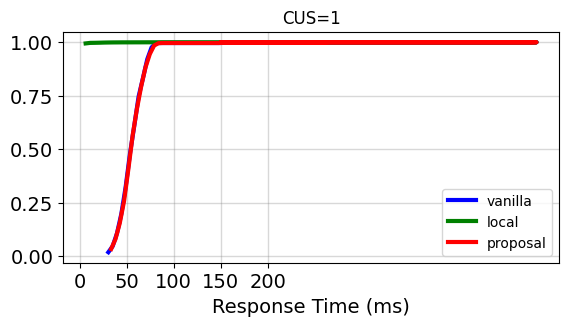

In [2]:
import matplotlib.pyplot as plt
import utils as ut
import numpy as np
##### CONFIG HERE #####
CONCUR_USER = 1
PERCENTAGE = 100
#######################
RESULT_FOLDER="result/24_07_01_23h_mon/"
FILE_NAME = "mul_edge_nonau"


scenarios = ["vanilla", "local", "proposal"]

responseTimes = {}
responseTimes["vanilla"] = ut.readFromCSVFile(f"{RESULT_FOLDER}vanilla_{CONCUR_USER}.csv", PERCENTAGE)
# responseTimes["local"] = ut.readFromCSVFile(f"{RESULT_FOLDER}local_{CONCUR_USER}.csv", PERCENTAGE)
responseTimes["proposal"] = ut.readFromCSVFile(f"{RESULT_FOLDER}proposal_{CONCUR_USER}.csv", PERCENTAGE)

maxResponseTime = max([responseTimes[s][-1] for s in scenarios])
for scenario in scenarios:
    responseTimes[scenario].append(maxResponseTime)

array_x = np.array([150.0, 200.0, 250.0])
array_y = np.array([1.0, 1.0, 1.0])

colour = ["blue", "green"]
signal_info = {}
for i, s in enumerate(scenarios):
    signal_info[s] = {
        "label": s,
        "color": colour[i]
    }

plt.figure(figsize=(6.4, 3))

# Loop through each signal in the signal_info dictionary
for sig_key, sig_props in signal_info.items():
    sig_x = ut.CDF(responseTimes[sig_key])["bins"][1:]
    sig_y = ut.CDF(responseTimes[sig_key])["CDF"]
    sig_x = np.append(sig_x, array_x)
    sig_y = np.append(sig_y, array_y)
    plt.plot(sig_x, sig_y, label=sig_props["label"], color=sig_props["color"], linewidth=3)


# plt.figure(figsize=(6.4, 3))

# plt.plot(sig_edge_x, sig_edge_y, label="SIG-DEFAULT", color="orange", linewidth=3)
# plt.plot(sig_default_x, sig_default_y, label="SIG-EDGE", color="blue", linewidth=3)

plt.title(f"CUS={CONCUR_USER}")
plt.xticks(range(0, 201, 50))
plt.xlabel("Response Time (ms)", size=14)
# plt.ylabel("CDF")
plt.tick_params(axis='x', labelsize=14)  # Change x-tick label size to 14
plt.tick_params(axis='y', labelsize=14)  # Change y-tick label size to 14
plt.grid(True, which='both', linestyle='-', linewidth=1, color='gray', alpha=0.3)

plt.legend()
# plt.savefig('./figures/CDF.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

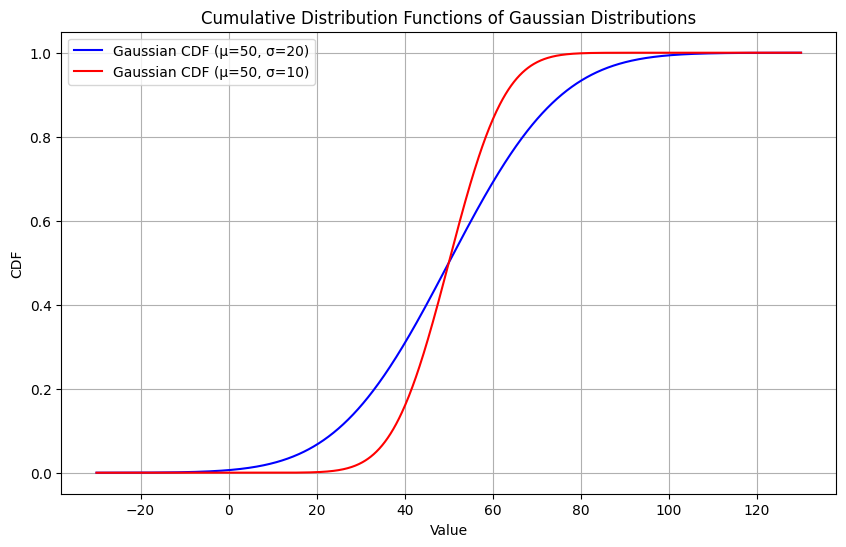

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distributions
mu = 50
sigma1 = 20
sigma2 = 10

# Generate a range of values for x
x = np.linspace(mu - 4*sigma1, mu + 4*sigma1, 1000)

# Calculate the CDF for both distributions
cdf1 = norm.cdf(x, loc=mu, scale=sigma1)
cdf2 = norm.cdf(x, loc=mu, scale=sigma2)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(x, cdf1, label=f'Gaussian CDF (μ={mu}, σ={sigma1})', color='blue')
plt.plot(x, cdf2, label=f'Gaussian CDF (μ={mu}, σ={sigma2})', color='red')
plt.title('Cumulative Distribution Functions of Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()



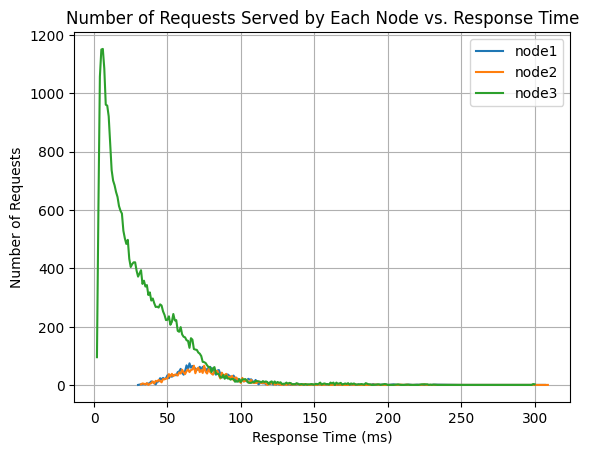

In [9]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store response times for each node
response_times = {'node1': {}, 'node2': {}, 'node3': {}}

# Read the data file
with open('result/24_06_27_12h_thu/proposal.txt', 'r') as file:
    for line in file:
        responseTime, nodeName = line.split()
        responseTime = int(responseTime)
        if responseTime in response_times[nodeName]:
            response_times[nodeName][responseTime] += 1
        else:
            response_times[nodeName][responseTime] = 1

# Process the data for each node and plot
for node, times in response_times.items():
    sorted_response_times = sorted(times.items())
    x, y = zip(*sorted_response_times)  # Unpack the sorted items into x (response times) and y (counts)
    
    # Plot the data for each node
    plt.plot(x, y, label=node)

# Configure the plot
plt.xlabel('Response Time (ms)')
plt.ylabel('Number of Requests')
plt.title('Number of Requests Served by Each Node vs. Response Time')
plt.grid(True)
plt.legend()
plt.show()